In [28]:
library(SingleCellExperiment)
library(ggplot2)
library(ggthemes)

In [4]:
## input files folder
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/input_files/"

In [15]:
### Endodiff SmartSeq2 data
### all time points (day0,1,2,3)
sce = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/endodiff_clean.rds")

In [16]:
sce

class: SingleCellExperiment 
dim: 11231 34256 
metadata(4): log.exprs.offset log.exprs.offset log.exprs.offset
  log.exprs.offset
assays(3): tpm counts logcounts
rownames(11231): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272325_NUDT3 ENSG00000272398_CD24
rowData names(17): exprs_collapsed_to ensembl_transcript_id ...
  is_intop2000hvg is_hvg
colnames(34256): 21843_1#10 21843_1#100 ... 24539_8#97 24539_8#98
colData names(123): adj_x adj_y ... princ_curve princ_curve_scaled01
reducedDimNames(1): PCA
spikeNames(1): ERCC
altExpNames(0):

In [8]:
## make sample mapping file
df = data.frame(genotype_individual_id = sce$donor_long_id,
                phenotype_sample_id = colnames(sce))
head(df,2)

genotype_individual_id,phenotype_sample_id
HPSI0114i-joxm_1,21843_1#10
HPSI0314i-fafq_1,21843_1#100


In [10]:
smf_filename = paste0(mydir,"sample_mapping_file.csv")
write.csv(df, smf_filename, quote = F, row.names = F)

In [ ]:
## make phenotype file

In [19]:
logcounts(sce)[1:5,1:5]

,21843_1#10,21843_1#100,21843_1#101,21843_1#102,21843_1#103
ENSG00000000003_TSPAN6,5.5207770563,6.4562078,5.878671,4.8608241,5.903640
ENSG00000000419_DPM1,5.3924605058,6.0659226,6.838769,6.6142685,6.512403
ENSG00000000457_SCYL3,0.0001741556,0.3525966,0.000000,0.8259555,2.201697
ENSG00000000460_C1orf112,1.4719275194,4.5369683,4.318528,5.3730090,4.636175
ENSG00000001036_FUCA2,2.9088018801,3.8673273,3.321747,3.7364760,4.917576


In [20]:
df_pheno = as.data.frame(logcounts(sce))
pheno_filename = paste0(mydir,"phenotype.csv")
write.csv(df_pheno, pheno_filename, quote = F)

In [14]:
## make env file (PCs)

In [42]:
pcs = prcomp(t(logcounts(sce[rowData(sce)$is_intop500hvg,])))

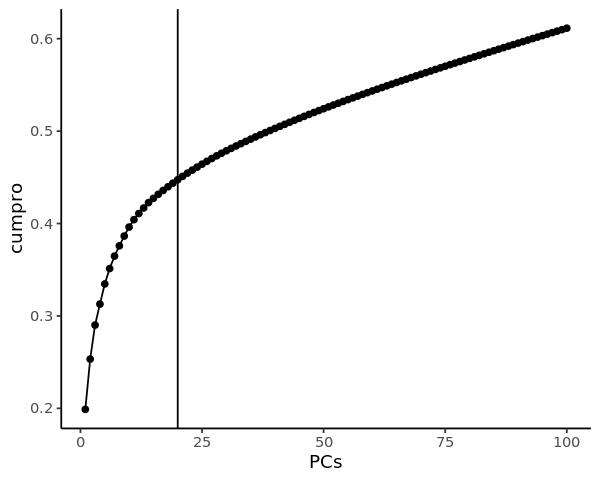

In [57]:
N = 100
x = 20
df0 = data.frame(PCs = 1:N,
                 cumpro = summary(pcs)$importance[3,1:N])
# head(df0)
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df0, aes(x = PCs, y = cumpro)) + geom_point() + geom_line() + theme_classic() + 
    geom_vline(xintercept = x)

In [45]:
df_pca = as.data.frame(pcs$x[,1:50])
df_pca[1:5,1:5]

,PC1,PC2,PC3,PC4,PC5
21843_1#10,-12.241231,-12.61522,0.5472086,-11.411204,-7.052088
21843_1#100,4.509125,-27.06629,7.5564469,-9.366868,-1.471991
21843_1#101,-1.273414,-23.32348,-0.5019034,-3.819575,-1.463243
21843_1#102,-14.962566,-12.96637,1.9674060,-5.446326,-13.316007
21843_1#103,-6.341665,-19.01047,-2.8249750,-2.462769,-7.521426


In [46]:
df_pca$day = sce$day

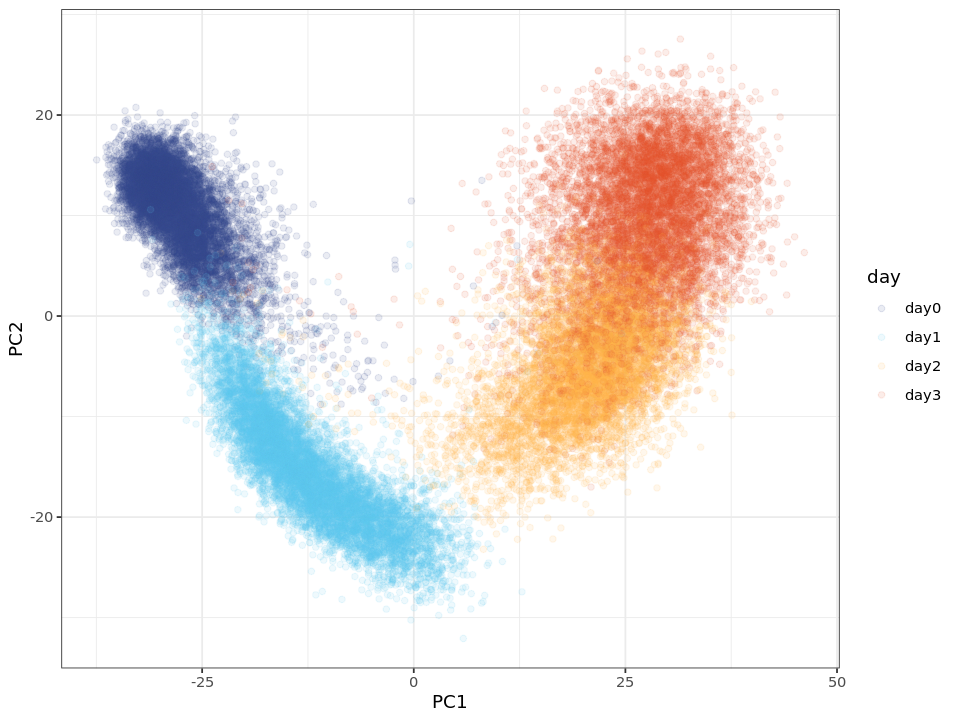

In [47]:
options(repr.plot.width = 8, repr.plot.height = 6)
p = ggplot(df_pca, aes(x = PC1, y = PC2, col = day)) + geom_point(alpha = 0.1) + theme_bw()
p = p + scale_color_canva(palette = "Pool party") 
p

In [48]:
env_filename = paste0(mydir,"10PCs.csv")
write.csv(df_pca[,1:10], env_filename, quote = F)

In [49]:
env_filename = paste0(mydir,"15PCs.csv")
write.csv(df_pca[,1:15], env_filename, quote = F)

In [50]:
env_filename = paste0(mydir,"20PCs.csv")
write.csv(df_pca[,1:20], env_filename, quote = F)

In [51]:
env_filename = paste0(mydir,"25PCs.csv")
write.csv(df_pca[,1:25], env_filename, quote = F)

In [ ]:
## make feature-variant filter file

In [61]:
fvf_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/eqtl_allstages.tsv"
df_fvf = read.csv(fvf_filename, sep="\t")
nrow(df_fvf)
head(df_fvf,2)

[1] 4877

snp_id,feature,stage
5_149826526_C_T,ENSG00000164587_RPS14,ips
11_57283988_C_T,ENSG00000134809_TIMM10,ips


In [65]:
fvf_filename = paste0(mydir,"endodiff_eqtl_allconditions_FDR10pct.csv")
write.csv(df_fvf, fvf_filename, quote = F, row.names = F)